# Time Evolution of quantum system

### Applied to our project at the bottom

In [1]:
from qutip import *
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

#### Unitary evolution
- closed qantum system -> deterministic, stochastic

Time evolution of a quantum spin-1/2 system with tunneling rate 0.1 (initially in up state):

In [14]:
delta = 0.2 * 2*np.pi
eps0 = 1.0 * 2*np.pi
gamma1 = 0.5

In [15]:
H = 2*np.pi * 0.1 * sigmax() # Hamiltonian
psi0 = basis(2, 0) # initial state vector of the wave function

times = np.linspace(0.0, 50.0, 500) # range [0,1], N [3] -> the higher the smoother the graph

In [17]:
result = sesolve(H, psi0, times, [sigmaz()]) #  calculate unitary (non-dissipative) time-evolution of an arbitrary state vector |ψ0⟩ (psi0) -> evolves state vector and evaluates the expectation values for a set of operators expt_ops at the points in time in the list times
result.expect # list of expectation values for the operators that are included in the list in the fifth argument

In [19]:
result = sesolve(H, psi0, times, [sigmaz(), sigmay(), sigmax()])
expt_list = result.expect

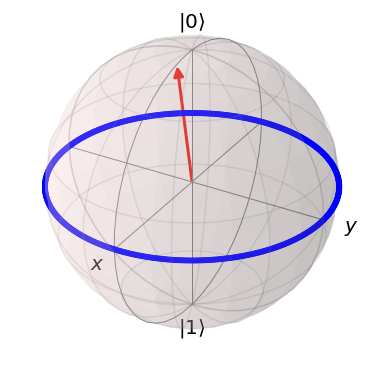

In [11]:
sphere = Bloch()

sphere.add_points([expt_list[0],
                   expt_list[1],
                   expt_list[2]])
sphere.vector_color = ['r']

sphere.add_vectors(np.array([delta, 0, eps0]) / np.sqrt(delta ** 2 + eps0 ** 2))

sphere.render()

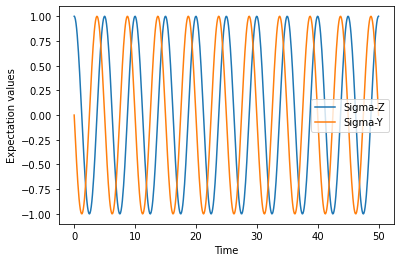

In [ ]:
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-Z", "Sigma-Y"))
plt.show()


#### Non-unitary evolution
- open quantum system -> therefore dissipative (losing energy)
- transitions between energy levels -> uncertainty in phase difference between states of system
- described as averaged states in density matrix -> probability distribution of quantum states
- **includes incoherent processes such as RELAXATION and DEPHASING**

Time evolution of system density matrix:


**important that the decay rates γn be smaller than the minimum energy splitting in the system Hamiltonian**

``mesolve`` -> automatically determines if it is sufficient to use the Schrödinger equation  (if no collapse operators were given) or if it has to use the master equation (if collapse operators were given)
``c_ops`` -> list of collapse operators (dissipation process) -> 4th argument of mesolve

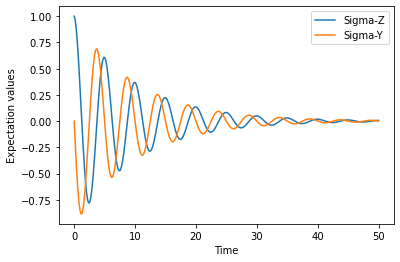

In [ ]:
result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay(), sigmax()]) # relaxation process (describing the dissipation of energy from the spin to its environment) added as np.sqrt(0.05)*sigmax() --> 0.05 is rate

fig, ax = plt.subplots()
ax.plot(times, result.expect[0])
ax.plot(times, result.expect[1])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-Z", "Sigma-Y"))
plt.show()

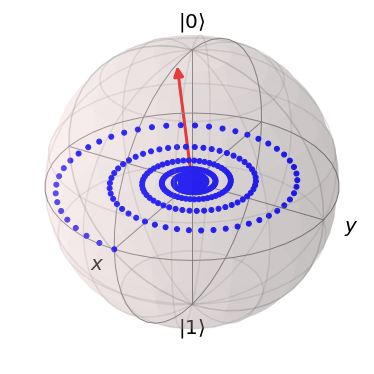

In [ ]:
expt_list = result.expect
sphere = Bloch()

sphere.add_points([expt_list[0], expt_list[1],
                   expt_list[2]])
sphere.vector_color = ['r']

sphere.add_vectors(np.array([delta, 0, eps0]) / np.sqrt(delta ** 2 + eps0 ** 2))

sphere.render()

### *ADVANCED
#### Bloch-Redfield master equation
- approach to derive a master equation from a microscopic system
- for example systems with varying energy biases and eigenstates and that couple to an environment in some well-defined manner
- https://qutip.org/docs/latest/guide/dynamics/dynamics-bloch-redfield.html

In [56]:
def ohmic_spectrum(w):
    if w == 0.0: # dephasing inducing noise
        return gamma1
    else: # relaxation inducing noise
        return gamma1 / 2 * (w / (2 * np.pi)) * (w > 0.0)

H = - delta/2.0 * sigmax() - eps0/2.0 * sigmaz()

R, ekets = bloch_redfield_tensor(H, [[sigmax(), ohmic_spectrum]])

print(R)


tlist = np.linspace(0, 15.0, 1000)
psi0 = rand_ket(2)
e_ops = [sigmax(), sigmay(), sigmaz()]

expt_list = bloch_redfield_solve(R, ekets, psi0, tlist, e_ops)
expt_list

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.        +0.j         0.        +0.j         0.        +0.j
   0.24514517+0.j       ]
 [ 0.        +0.j        -0.16103412-6.4076169j  0.        +0.j
   0.        +0.j       ]
 [ 0.        +0.j         0.        +0.j        -0.16103412+6.4076169j
   0.        +0.j       ]
 [ 0.        +0.j         0.        +0.j         0.        +0.j
  -0.24514517+0.j       ]]


[array([ 6.22828865e-01,  6.84648257e-01,  7.40717145e-01,  7.90548183e-01,
         8.33715014e-01,  8.69854659e-01,  8.98670746e-01,  9.19935943e-01,
         9.33493743e-01,  9.39259590e-01,  9.37221190e-01,  9.27438350e-01,
         9.10042111e-01,  8.85233190e-01,  8.53279678e-01,  8.14514404e-01,
         7.69331454e-01,  7.18182220e-01,  6.61571017e-01,  6.00050171e-01,
         5.34214616e-01,  4.64696210e-01,  3.92157882e-01,  3.17287125e-01,
         2.40789628e-01,  1.63382733e-01,  8.57887648e-02,  8.72813334e-03,
        -6.70871116e-02, -1.40959741e-01, -2.12213992e-01, -2.80201533e-01,
        -3.44307258e-01, -4.03954836e-01, -4.58612119e-01, -5.07795400e-01,
        -5.51073833e-01, -5.88073354e-01, -6.18479661e-01, -6.42040672e-01,
        -6.58568804e-01, -6.67942607e-01, -6.70106886e-01, -6.65073393e-01,
        -6.52920431e-01, -6.33791720e-01, -6.07894310e-01, -5.75497096e-01,
        -5.36927800e-01, -4.92569194e-01, -4.42855808e-01, -3.88269712e-01,
        -3.2

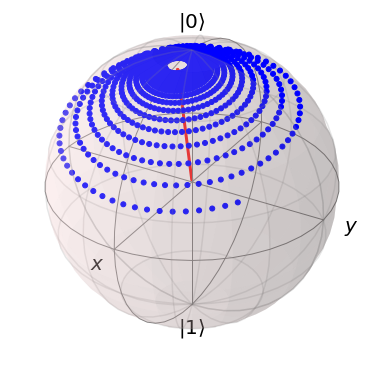

In [57]:
sphere = Bloch()

sphere.add_points([expt_list[0], expt_list[1], expt_list[2]])

sphere.vector_color = ['r']

sphere.add_vectors(np.array([delta, 0, eps0]) / np.sqrt(delta ** 2 + eps0 ** 2))

sphere.make_sphere()

#### A two-level system coupled to a cavity: The Jaynes-Cummings model
- describes coupling between a two-level atom (atom consisting of two distinguishable quantum states (e.g. H+) and a single-mode electromagnetic field (cavity mode)

In [ ]:
N = 2 # number of Fock states included in the cavity mode

omega_a = 1.0 # atom energy splitting
omega_c = 1.25 # cavity energy splitting

g = 0.05 # atom-cavity interaction strength

# tensor products of individual operators -> forms operators acting on the state vectors in the combined Hilbert space -> constructs Hamiltonians for composite systems (antisymmetric for fermions)

a = tensor(qeye(2), destroy(N)) # qeye = identity -> leaves specified component unchanged
sm = tensor(destroy(2), qeye(N))
sz = tensor(sigmaz(), qeye(N))

H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

print(H)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5   0.    0.    0.  ]
 [ 0.    1.75  0.05  0.  ]
 [ 0.    0.05 -0.5   0.  ]
 [ 0.    0.    0.    0.75]]


### Project: SPIN-1/2 PARTICLE IN A MAGNETIC FIELD
- Spin of a hydrogen nucleus (a proton) in a static magnetic field
- Beck 9.4

In [4]:
#
# STATIC magnetic field
#

"""Hydrogen atom spin states"""
# initial state vector of the wave function
psi0 = basis(2, 0) # spin-up state
#psi0 = basis(2, 1) # spin-down state
print("Initial state:\n", str(psi0), "\n")

gamma = 42.6 * 2 * pi # gyromagnetic ration of H

"""Magnetic field components"""
b_z = 0.001 # magnetic field strength (vector) --> SHOULD BE time dependent cause oscillating
omega = gamma * b_z # angular (Larmor) frequency
print("Larmor frequency:", omega, "\n")

"""Hamiltonian operator"""
H = omega * sigmax()
print("Hamiltonian operator:", "\n", str(H))

times = np.linspace(0.0, 50.0, 500) # range [0,1], N [3] -> the higher the smoother the graph

"""Time Evolution by Schrodinger"""
result = sesolve(H, psi0, times, [sigmaz(), sigmay(), sigmax()])

expt_list = result.expect

Initial state:
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]] 

Larmor frequency: 0.2676636940858504 

Hamiltonian operator: 
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         0.26766369]
 [0.26766369 0.        ]]


In [18]:
#
# OSCILLATING magnetic field
#
"""Hydrogen atom spin states"""
# initial state vector of the wave function
psi0 = basis(2, 0) # spin-up state
#psi0 = basis(2, 1) # spin-down state
print("Initial state:", str(psi0))

gamma = 42.6 * 2 * pi # gyromagnetic ration of H

times = np.linspace(0.0, 50.0, 500) # range [0,1], N [3] -> the higher the smoother the graph

"""Magnetic field components"""

b_z = 0.1 # magnetic field strength (vector)
b_x = 0.01 #
w = 0.2 # oscillating field frequency
# Larmor frequencies
omega_0 = gamma * b_z
omega_1 = gamma * b_x

"""Hamiltonian operator"""

def H_coeff(t, args): # coefficient function
    return omega_1 * cos(w*t)

#H_x = sigmaz(), H_coeff] # time-dependent hamiltonian
#H_z = sigmax()

H = [omega_0*sigmax(), [sigmaz(), H_coeff]]
print("Hamiltonian operator:", str(H))

"""Time Evolution by Schrodinger"""
result = sesolve(H, psi0, times, [sigmaz(), sigmay(), sigmax()])

expt_list = result.expect

Initial state: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Hamiltonian operator: [Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.         26.76636941]
 [26.76636941  0.        ]], [Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], <function H_coeff at 0x000001AFC3A62820>]]


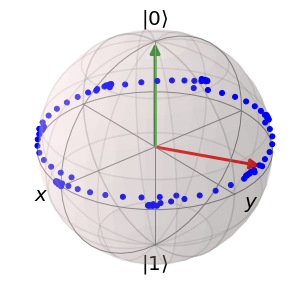

<Figure size 360x360 with 0 Axes>

In [19]:

"""Make ANIMATION"""
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

# First set up the figure, the axis, and the plot element we want to animate
fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
sphere = qutip.Bloch(axes=ax)

# animation function (called sequentially)
def animate(i): # generates new image each iteration
    sphere.clear()
    vector = [[expt_list[0][i], expt_list[1][i], expt_list[2][i]]] # new vector added where new point appears
    sphere.add_vectors(vector)
    sphere.add_points([expt_list[0][:i+1], expt_list[1][:i+1],
                       expt_list[2][:i+1]]) # new point added
    magfield_vec = [0,0,1]
    sphere.add_vectors(magfield_vec)
    sphere.vector_colormagfield_vec = [0,0,1] # static mag field 
    sphere.make_sphere()
    return ax

# initialization function: plot the background of each frame
def init(): # keep the vector same color
    sphere.vector_color = ['r','g']
    return ax

# call the animator.  blit=True means only re-draw the parts that have changed
ani = animation.FuncAnimation(fig, animate, init_func=init, repeat=False) # directly animates and saves under ani variable

# save the animation as mp4 (requires ffmpeg or mencoder to be installed)
# The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

ani.save('bloch_sphere.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

# play animation
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

In [ ]:

N = 2 # number of Fock states included in the cavity mode

# Zeeman effect??
omega_a = 1.0 # atom energy splitting
omega_c = 1.25 # cavity energy splitting

# tensor products -> constructs Hamiltonians for composite systems (antisymmetric for fermions)

a = tensor(qeye(2), destroy(N)) # qeye = identity -> leaves specified component unchanged
sm = tensor(destroy(2), qeye(N))
sz = tensor(sigmaz(), qeye(N))

H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

In [ ]:
# problem parameters :
#
delta = 0 * 2 * pi # qubit sigma_x coefficient
omega = 1.0 * 2 * pi # qubit sigma_z coefficient
A = 0.25 * 2 * pi # driving amplitude
w = 1.0 * 2 * pi # driving frequency
gamma1 = 0.0 # relaxation rate
n_th = 0.0 # average number of excitations
psi0 = basis (2 , 0) # initial state
#
# Hamiltonian
#
sx = sigmax() ; sy = sigmay() ; sz = sigmaz() ;
sm = destroy(2) ;
H0 = - (delta + omega) / 2.0 * sz
H1 = - A * sx
#
# define the time−dependence of the Hamiltonian
#
args = {'w' : w}
Ht = [H0, [H1, 'sin(w*t)']]
